# Comparing VoCC with DBSCAN on a real data example
We load the data of the particle experiment south of the tip of Africa to detect ocean eddies.
VoCC and DBSCAN are used to cluster these data and both algortihms are visually compared with their labels mapped back onto a world map.

In [18]:
# IMPORT
%run ../scripts/experiment_utils.py

import numpy as np
from sklearn.cluster import DBSCAN
from VoCC import VortexCorrelationClustering
import xarray as xr

In [ ]:
# Load the sliced and prepared real-world data with the format (n_samples x (longitude, latitude, x_movement, y_movement))
coordinates = np.load('../data/particles_29102011.npy')

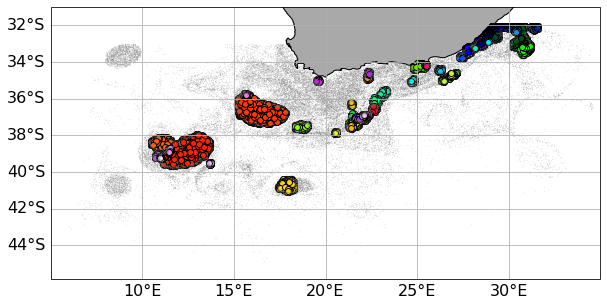

In [15]:
# DBSCAN (10km)
minimum_samples = 50
kms_per_radian = 6371
eps_km = 10
epsilon = eps_km / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=minimum_samples, metric='haversine', algorithm='ball_tree').fit(np.radians(coordinates[:,:2]))
labels = db.labels_
create_real_world_image(coordinates, labels, 'DBSCAN_29102011_eps20km')

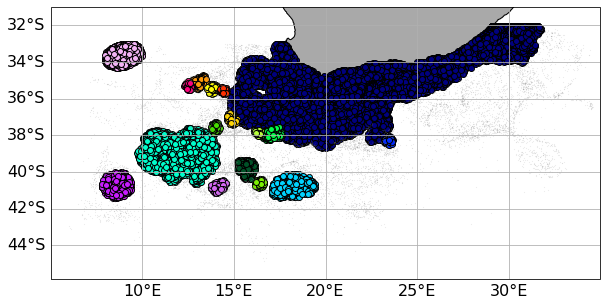

In [16]:
# DBSCAN (20km)
minimum_samples = 50
kms_per_radian = 6371
eps_km = 20
epsilon = eps_km / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=minimum_samples, metric='haversine', algorithm='ball_tree').fit(np.radians(coordinates[:,:2]))
labels = db.labels_
create_real_world_image(coordinates, labels, 'DBSCAN_29102011_eps20km')

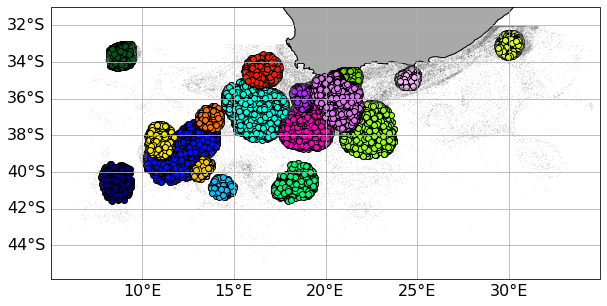

In [20]:
# VortexCorrelationClustering
vocc = VortexCorrelationClustering(radii=np.arange(4,24,4),resolution = .05, sectors = 7, circle_coverage_rate = .75, qth_threshold = .99, min_points = .01)
labels = vocc.fit(coordinates).labels_

create_real_world_image(coordinates, labels, 'VortexCorrelationClustering_ts29102011')